Summary Statistics:
                 count          mean           std    min    25%       50%  \
CreditScore    10000.0    650.528800     96.653299  350.0  584.0    652.00   
Balance        10000.0  76485.889288  62397.405202    0.0    0.0  97198.54   
NumOfProducts  10000.0      1.530200      0.581654    1.0    1.0      1.00   

                     75%        max  Skewness  Kurtosis  
CreditScore       718.00     850.00 -0.071596 -0.426113  
Balance        127644.24  250898.09 -0.141088 -1.489267  
NumOfProducts       2.00       4.00  0.745456  0.582089  


<ipython-input-1-a75d52a15975>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel", ax=axes[0])
<ipython-input-1-a75d52a15975>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Geography", data=df, palette="pastel", ax=axes[1])


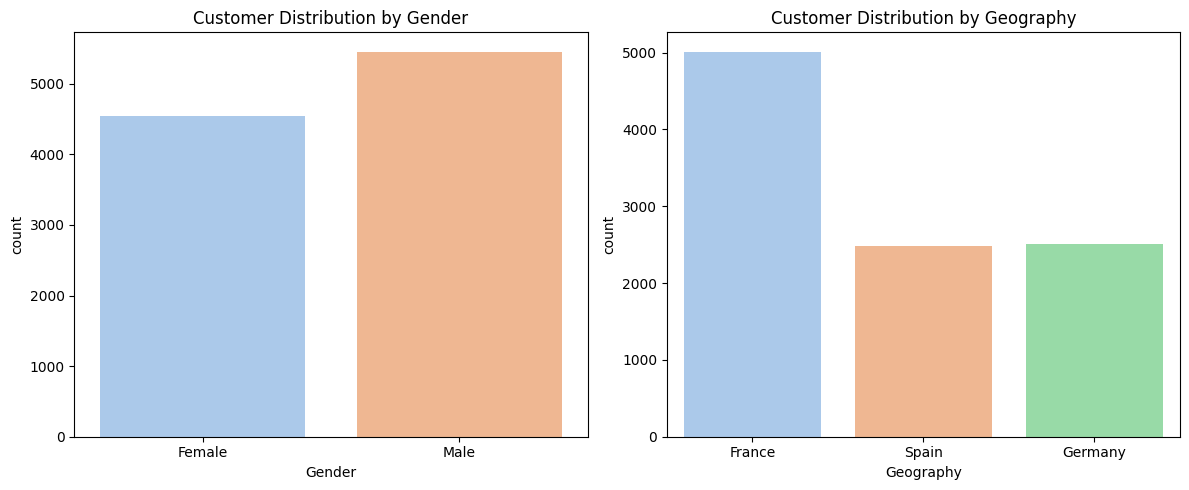

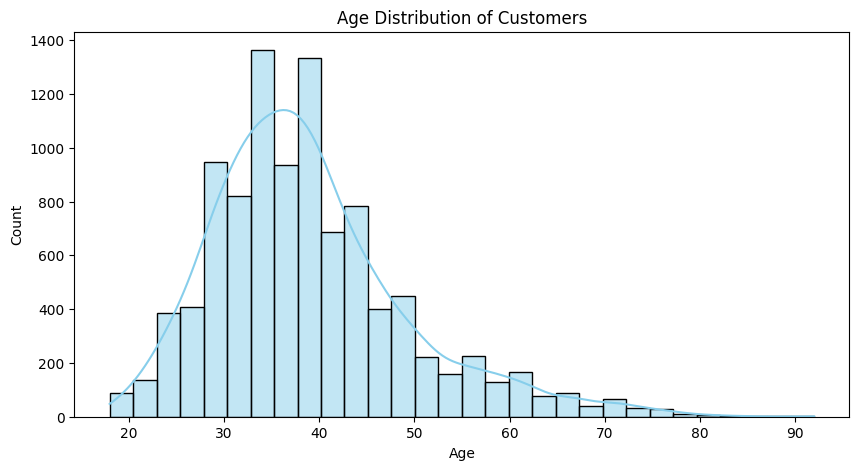

Transaction Stats (Active vs Inactive):
                min  max      mean
IsActiveMember                    
Inactive          1    4  1.524438
Active            1    4  1.535624


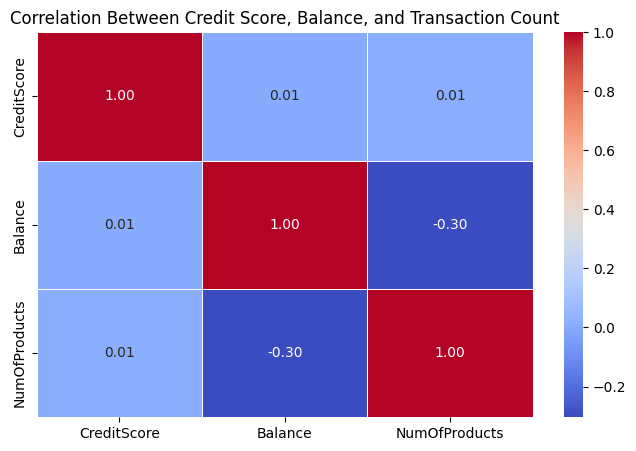

Balance & Transaction Stats (Stayed vs Churned):
              Balance                          NumOfProducts                 
                 mean     median           std          mean median       std
Exited                                                                       
Stayed   72742.750663   92063.06  62851.577108      1.544210    2.0  0.509542
Churned  91109.476006  109344.23  58346.483197      1.475466    1.0  0.801408
Probability of Low Credit Score & High Balance: 0.0638


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load dataset
file_path = "/content/archive (3).zip"
df = pd.read_csv(file_path)

# Summary Statistics for Key Variables
num_cols = ["CreditScore", "Balance", "NumOfProducts"]
summary_stats = df[num_cols].describe().T
summary_stats["Skewness"] = df[num_cols].apply(skew)
summary_stats["Kurtosis"] = df[num_cols].apply(kurtosis)
print("Summary Statistics:")
print(summary_stats)

# Customer Distribution by Gender and Geography
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="Gender", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Customer Distribution by Gender")
sns.countplot(x="Geography", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("Customer Distribution by Geography")
plt.tight_layout()
plt.show()

# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Transaction Count for Active vs Inactive Customers
transaction_stats = df.groupby("IsActiveMember")["NumOfProducts"].agg(["min", "max", "mean"])
transaction_stats.rename(index={0: "Inactive", 1: "Active"}, inplace=True)
print("Transaction Stats (Active vs Inactive):")
print(transaction_stats)

# Correlation Between Credit Score, Balance, and Transaction Count
correlation_matrix = df[["CreditScore", "Balance", "NumOfProducts"]].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Credit Score, Balance, and Transaction Count")
plt.show()

# Differences in Balance and Transaction Activity (Stayed vs Churned)
churn_stats = df.groupby("Exited")[["Balance", "NumOfProducts"]].agg(["mean", "median", "std"])
churn_stats.rename(index={0: "Stayed", 1: "Churned"}, inplace=True)
print("Balance & Transaction Stats (Stayed vs Churned):")
print(churn_stats)

# Probability of Low Credit Score and High Balance
low_credit_threshold = df["CreditScore"].quantile(0.25)
high_balance_threshold = df["Balance"].quantile(0.75)
low_credit_high_balance = df[(df["CreditScore"] <= low_credit_threshold) &
                             (df["Balance"] >= high_balance_threshold)]
probability = len(low_credit_high_balance) / len(df)
print(f"Probability of Low Credit Score & High Balance: {probability:.4f}")
